### PyTorch Workflow - https://www.learnpytorch.io/01_pytorch_workflow/

In [1]:
whatWereCovering = {1: "data (prepare & load)", 
                    2: "build model", 
                    3: "fitting the model to data (train model)", 
                    4: "predicting data and evaluating the model (inference)", 
                    5: "save & load a model", 
                    6: "putt everything together"}

whatWereCovering

{1: 'data (prepare & load)',
 2: 'build model',
 3: 'fitting the model to data (train model)',
 4: 'predicting data and evaluating the model (inference)',
 5: 'save & load a model',
 6: 'putt everything together'}

In [2]:
import torch, intel_extension_for_pytorch as ipex
from torch import nn # nn contains all of pytorch's building blocks for NNs
import matplotlib.pyplot as plt 

torch.__version__

J:\Coding\Codes\python\deepLearning\.venv\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: ''If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


'2.1.0a0+cxx11.abi'

### 1. Data (preparing & loading)
Data can be almost anything in ML
* Excel spreadsheet
* Images of any kind
* Videos (Youtube)
* Audios
* DNA
* Texts

ML has 2 parts:
1. Get data into a numerical representation
2. Build a model to learn patterns in that numerical representation 

##### Create some *known* data using the linear regression formula -> Y = a + bX
##### we can make a straight line with this formula using known **parameters** - parameters are something the model learns

In [3]:
# creation of known parameters
weight = 0.7 # 'b' from linear regression formula
bias = 0.3 # 'a' term in the formula

# create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [4]:
len(X), len(y)

(50, 50)

### Splitting data into training and test sets (one of the most important concepts in ML in general)
Creating a training & test set with data

In [5]:
# create a tran/test split
trainSplit = int(0.8 * len(X))
trainSplit

40

In [6]:
X_train, y_train = X[:trainSplit], y[:trainSplit]
X_test, y_test = X[trainSplit:], y[trainSplit:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [7]:
X_train, y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

##### How to better visualize data?
a motto: "Visualize, visualize, visualize!!"

In [8]:
def plot_predictions(train_data = X_train, train_labels = y_train, test_data = X_test, test_labels = y_test, predictions = None):
    """
    Plots training data, test data and compares predictions
    """
    plt.figure(figsize=(10, 7))
    
    # plot training data in blue
    plt.scatter(train_data, train_labels, c="r", s=4, label = "Training data")
    
    # plot test data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label = "Test data")
    
    #check if there are predictions
    if predictions is not None:
        # plot predictions if they exist
        plt.scatter(test_data, predictions, c="y", s=4, label="Predictions")
        
    plt.legend(prop={"size": 14})

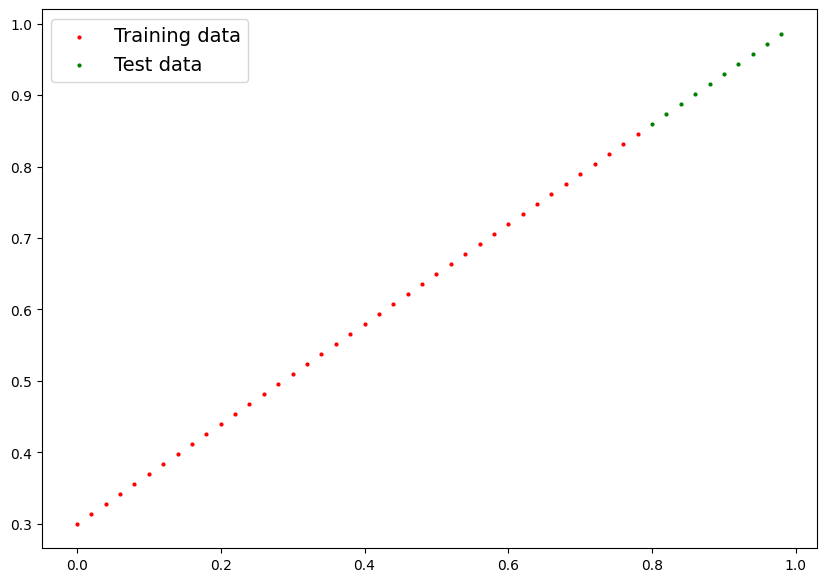

In [9]:
plot_predictions()

### 2. Build model

First pytorch model
for this we need python classes: https://realpython.com/python3-object-oriented-programming/

What the model does:
* Start with random values (weight & bias)
* Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weights and biases used to create the data)

How? Using two main algorithms:
1. Gradient descent
2. Backpropagation

In [10]:
# create linear regression model class
class LinearRegressionModel(nn.Module): # almost everything in pytorch inherits from nn.module
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, requires_grad = True, dtype = torch.float))
        self.bias = nn.Parameter(torch.randn(1, requires_grad = True, dtype = torch.float))
        
    # forward method to define the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- 'x' is the input data/training data
        return self.weights * x + self.bias # linear regression formula 
    

### PyTorch model building essentials

* `torch.nn` - contains all the building blocks for computational graphs (neural networks can be considered as computational graphs)
* `torch.nn.Parameter` - what parameters should our model try and learn, often a pytorch layer from torch.nn will set these for us
* `torch.nn.Module` - the base class for all NN modules, if you subclass it, you should overwrite forward()
* `torch.optim` - this is where optimizers in pytorch live, they will help with gradient descent 
* `def forward()` -  all nn.Module subclasses are required to overwrite this method, this method defines what happens in the forward computation

https://pytorch.org/tutorials/beginner/ptcheat.html

In [11]:
# checking the parameters inside our model using `.parameters()`
torch.manual_seed(42)

model_0 = LinearRegressionModel()

list(model_0.parameters()) 

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [12]:
weight, bias # we want our model to eventually adjust its weight and bias to these values or at least very near them

(0.7, 0.3)

In [13]:
# list named parameters 
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making a prediction using `torch.inference_mode()`

to check the models predictive power, let us see how well it predicts `y_test` based on `X.test`

when data is passed through the model, it will run it through the `forward()` method 

In [14]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [15]:
y_preds = model_0(X_test)
y_preds # but matplotlib won't work with this version of y_pred, due to it having a grad_fn. Basically this version keeps the gradient tracking, but inference mode doesn't, hence that can be used in numpy and matplotlib

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

In [16]:
# predictions
with torch.inference_mode():
    y_preds = model_0(X_test)
    
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [17]:
# torch.no_grad() can also be used for similar results, but torch.inference_mode() is preferred
with torch.no_grad():
    y_preds = model_0(X_test)
    
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

inference mode thread - https://x.com/PyTorch/status/1437838236529868803

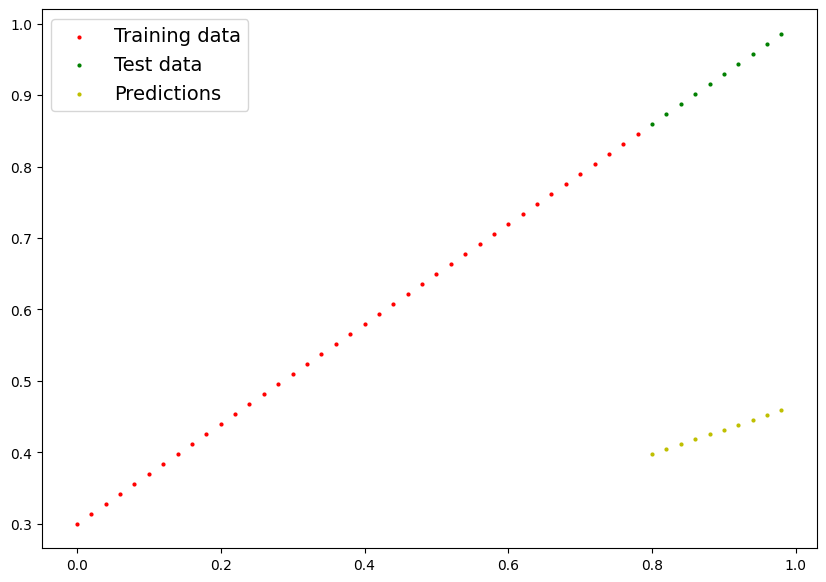

In [18]:
plot_predictions(predictions=y_preds)

### 3. Train model

* The whole idea of training is for a model to move from some unknown parameters (these may be random) to some *known* parameters
* basically, from a poor representation of the data to a better representation
* one way to measure how wrong the model's predictions are is to use a **loss function**
* Loss function can also be known as **cost function** or **criterion**

We mainly need the following:
* **Loss function**: is a function to measure how wrong a model's predictions are to the ideal outfits, so *lower* values are better
* **Optimizer**: Takes into account the loss of a model and adjust the model's parameters (like weights & bias) to improve the loss function 

in PyTorch, we need:
* A training loop
* A testing loop

In [19]:
# parameters of the model - parameters are values the model sets itself 
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [20]:
# setting up a loss function - https://pytorch.org/docs/stable/generated/torch.nn.L1Loss.html#torch.nn.L1Loss
loss_fn = nn.L1Loss() # this function will calculate the Mean Absolute Error (MAE)

# setting up an optimizer (Stochastic Gradient Descent) - https://pytorch.org/docs/stable/generated/torch.optim.SGD.html#torch.optim.SGD
optimizer = torch.optim.SGD(params=model_0.parameters(), lr = 0.01) # lr = learning rate = one of the most important learning hyperparameter that has to be set

#### Loss functions and optimizers are problem specific, for our regression (prediction) problem, `nn.L1Loss()` as the loss func. and `torch.optim.SGD` will suffice as the optimizer

* The optimizer was passed 2 arguments, `params` are the parameters aiming to be optimized/changed to better represent the training data. Whereas, `lr` is the learning rate, the degree/amount of change actually done on the parameters. A small 'lr' will cause small changes to the 'params' while a big one will make big changes to 'params'. 

### Building a training loop (and a testing loop) in PyTorch

things in a training loop to be included:
0. Loop through the data & do the following in the loop...
1. Forward pass (this involves data moving through our model's `forward()` function(s)) to make predictions on data -  also called forward propagation
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss (**backpropagation**)
5. Optimizer step - use the optimizer to adjust the model's parameters to try and improve the loss (**gradient descent**)

In [21]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [22]:
torch.manual_seed(42)

In [23]:
torch.manual_seed(42)
# An epoch is one loop through the data....
epochs = 200 # a hyperparameter because we set it ourselves

# tracking different values
epoch_count = []
loss_values = []
test_loss_values = []

## Training
# 0. Loop through the data
for epoch in range(epochs):
    # Set the model to training mode
    model_0.train() # train mode sets all parameters that require gradients to actually ask for gradients - basically activates gradient tracking
    
    # 1. Forward pass
    y_pred = model_0(X_train)
    
    # 2. Calculate the loss
    loss = loss_fn(y_pred, y_train) # (input data, target data)
    #print(f"Loss: {loss}")
    
    # 3. Optimizer zero grad
    optimizer.zero_grad() # the gradients are NOT reset by default and hence need to be reset for each loop, this function does that job
    
    # 4. Perform backpropagation on the loss with respect to the parameters of the model
    loss.backward()
    
    # 5. Step the optimizer (perform gradient descent)
    optimizer.step() # by default, how the optimizer changes will accumulate through the loop, so we have to zero them in step 3 for the next iteration of the loop
    
    # testing
    model_0.eval() # turns off gradient tracking and other settings not required for testing (like dropout/batch norm layers)
    with torch.inference_mode(): # turns off gradient tracking & more things - https://x.com/PyTorch/status/1437838231505096708
    #with torch.no_grad(): # this is also used, but inference_mode() is preferred
        # 1. Do the forward pass
        test_pred = model_0(X_test)
        
        # 2. Calculate the loss 
        test_loss = loss_fn(test_pred, y_test)
    
    # printing the details    
    if epoch % 10 == 0:
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        
        print(f"Epoch: {epoch} | Loss: {loss} | Test loss; {test_loss}")      
        
        # print the model state_dict
        print(model_0.state_dict())

Epoch: 0 | Loss: 0.31288138031959534 | Test loss; 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | Loss: 0.1976713240146637 | Test loss; 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | Loss: 0.08908725529909134 | Test loss; 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30 | Loss: 0.053148526698350906 | Test loss; 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40 | Loss: 0.04543796554207802 | Test loss; 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50 | Loss: 0.04167863354086876 | Test loss; 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60 | Loss: 0.03818932920694351 | Test loss; 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788

In [24]:
import numpy as np
loss_values, np.array(torch.tensor(loss_values).numpy()) # matplotlib works with numpy but loss values are torch tensors with grad on, so these either need conversions or the grad has to be set to off

([tensor(0.3129, grad_fn=<MeanBackward0>),
  tensor(0.1977, grad_fn=<MeanBackward0>),
  tensor(0.0891, grad_fn=<MeanBackward0>),
  tensor(0.0531, grad_fn=<MeanBackward0>),
  tensor(0.0454, grad_fn=<MeanBackward0>),
  tensor(0.0417, grad_fn=<MeanBackward0>),
  tensor(0.0382, grad_fn=<MeanBackward0>),
  tensor(0.0348, grad_fn=<MeanBackward0>),
  tensor(0.0313, grad_fn=<MeanBackward0>),
  tensor(0.0279, grad_fn=<MeanBackward0>),
  tensor(0.0245, grad_fn=<MeanBackward0>),
  tensor(0.0210, grad_fn=<MeanBackward0>),
  tensor(0.0176, grad_fn=<MeanBackward0>),
  tensor(0.0142, grad_fn=<MeanBackward0>),
  tensor(0.0107, grad_fn=<MeanBackward0>),
  tensor(0.0073, grad_fn=<MeanBackward0>),
  tensor(0.0039, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>)],
 array([0.31288138, 0.19767132, 0.08908726, 0.05314853, 0.04543797,
        0.04167863, 0.03818933, 0.0347609 , 0.03132383, 0.0278874 ,
   

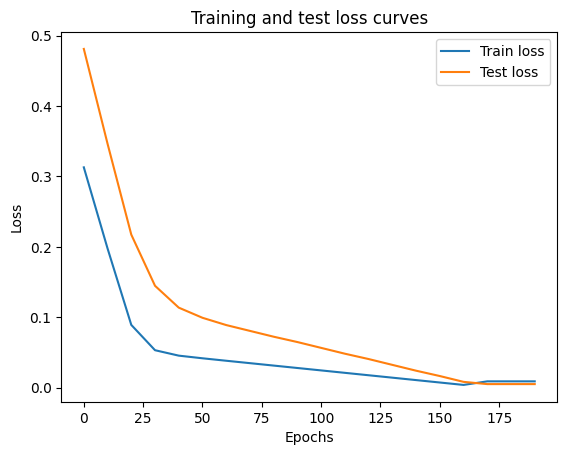

In [25]:
# plot the loss curves
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title('Training and test loss curves')
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [26]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

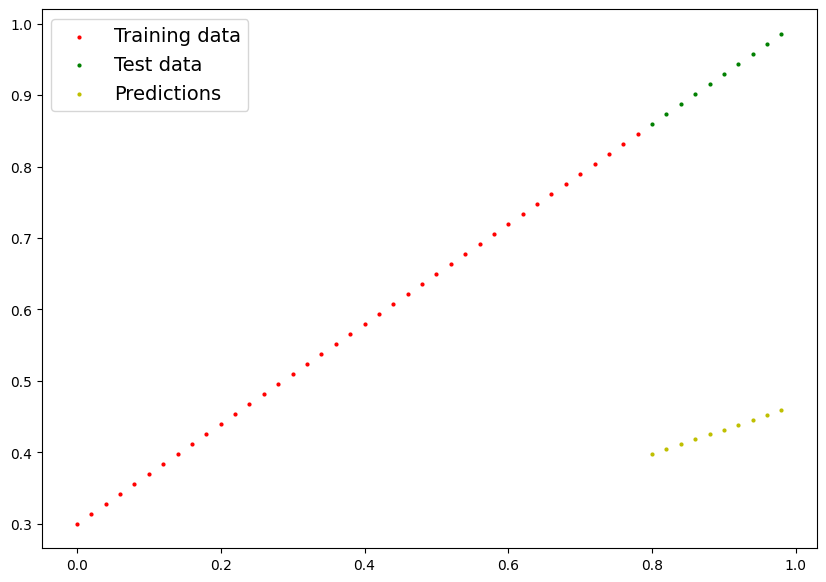

In [27]:
plot_predictions(predictions=y_preds)

In [28]:
with torch.inference_mode():
    y_preds_new = model_0(X_test)

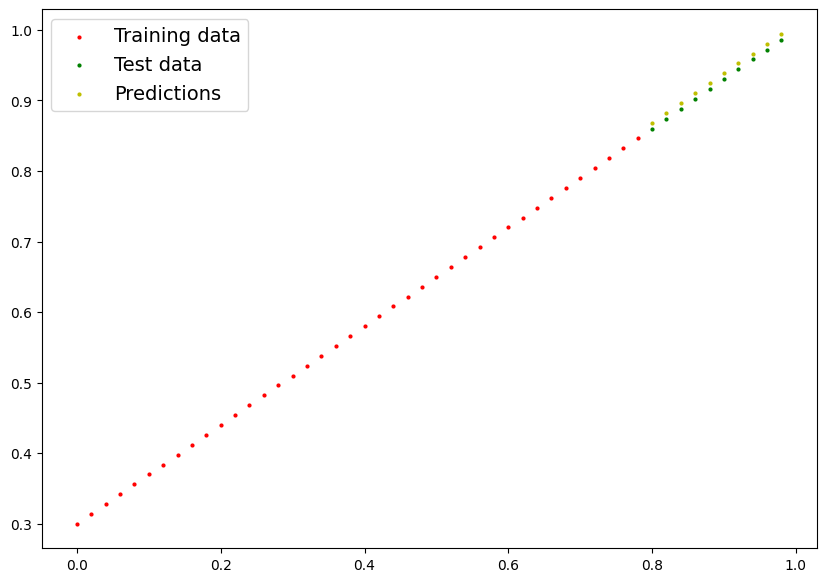

In [29]:
plot_predictions(predictions=y_preds_new)

### Saving a model in pytorch - https://pytorch.org/tutorials/beginner/saving_loading_models.html

3 main methods for saving and loading models
1. `torch.save()` - allows to save a pytorch object in python's pickle format - https://docs.python.org/3/library/pickle.html
2. `torch.load()` - used to load a saved pytorch object
3. `torch.nn.Module.load_state_dict()` - this allows to save a model's saved state dictionary

In [30]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [31]:
# saving model
from pathlib import Path

# 1. create model's directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. create a model save path
MODEL_NAME = "chapter_1_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(MODEL_SAVE_PATH)

# 3. save the model state_dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
#torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

models\chapter_1_model_0.pth
Saving model to: models\chapter_1_model_0.pth


### Loading a pytorch model
Since the model's `state_dict()` is saved rather than the entire model, we can create a new instance of the model class and load this saved `state_dict` into that 

In [32]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [33]:
# To load in a saved state_dict, we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()
print(loaded_model_0.state_dict())

# load the saves state_dict of model_0, this will update the state_dict of the new model (with the stored one's parameters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])


<All keys matched successfully>

In [34]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [35]:
# make some predictions with the loaded model
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test)
    
loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [36]:
# compare loaded model preds with original model preds
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)
  
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

### 6. Putting it all together

repeat the previous step but all in one place

# import pytorch and matplotlib
import torch
import intel_extension_for_pytorch as ipex
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

Create device agnostic code.

this mean the code will use a gpu/xpu if available for faster computing. If no gpu/xpu is there the code will default to the cpu

In [37]:
# device agnostic code
device = "xpu" if torch.xpu.is_available() else "cpu"
print(f"Device: {device}")

Device: xpu


#### 6.1: Data

In [38]:
# create some data using the linear regression formula of y = weight * X + bias
weight = 0.7
bias = 0.3

# create range values
start = 0
end = 1
step = 0.02

# create X & y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1) # without un-squeeze, there will be errors
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [39]:
# split data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

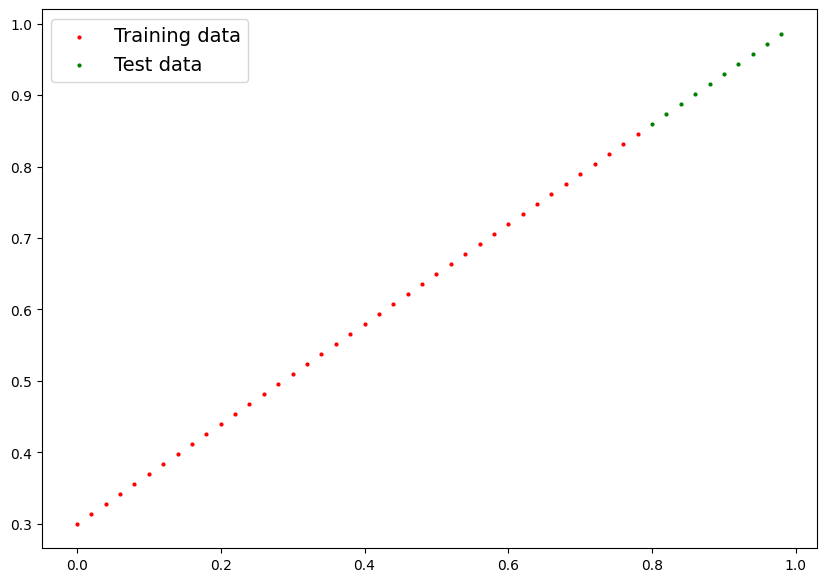

In [40]:
# plot the data
plot_predictions(X_train, y_train, X_test, y_test)

#### 6.2 Building a pytorch linear model

In [41]:
# create a model by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        # use nn.Linear() for creating the model parameters / also called: linear transform, probing layer, fully connected layer, dense layer
        self.linear_layer = nn.Linear(in_features=1, out_features=1)
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

# set the manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [42]:
X_train[:5], y_train[:5]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560]]))

In [43]:
next(model_1.parameters()).device

device(type='cpu')

In [44]:
# set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='xpu', index=0)

### 6.3 Training

for training:
* Loss function
* Optimizer
* Training loop
* Testing loop

In [45]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]], device='xpu:0')),
             ('linear_layer.bias', tensor([0.8300], device='xpu:0'))])

In [46]:
# set up a loss function
loss_fn = nn.L1Loss() # same as MAE

# set up an optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),lr=0.01)

In [47]:
# send the loss_fn/criterion to the xpu
loss_fn = loss_fn.to("xpu")

In [48]:
# optimize the model for ipex
model_1, optimizer = ipex.optimize(model_1, optimizer=optimizer)

In [49]:
# writing the training loop
torch.manual_seed(42)

epochs = 200

# put data on the target device (device agnostic code for data)
X_train, y_train, X_test, y_test = X_train.to(device), y_train.to(device), X_test.to(device), y_test.to(device) 


for epoch in range(epochs):
    model_1.train()
    
    # 1. forward pass
    y_pred = model_1(X_train)
    
    # 2. calculate the loss
    loss = loss_fn(y_pred, y_train)
    
    # 3. optimizer zero grad
    optimizer.zero_grad()
    
    # 4. Perform backpropagation
    loss.backward()
    
    # 5. optimizer step
    optimizer.step()
    
    ### testing 
    model_1.eval()
    with torch.inference_mode():
        test_pred = model_1(X_test)
        
        test_loss = loss_fn(test_pred, y_test)
        
    # print details
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Loss: 0.5551779270172119 | Test loss: 0.5739762783050537
Epoch: 10 | Loss: 0.439968079328537 | Test loss: 0.4392663538455963
Epoch: 20 | Loss: 0.3247582018375397 | Test loss: 0.30455657839775085
Epoch: 30 | Loss: 0.20954833924770355 | Test loss: 0.16984672844409943
Epoch: 40 | Loss: 0.09433843940496445 | Test loss: 0.03513689711689949
Epoch: 50 | Loss: 0.023886388167738914 | Test loss: 0.04784906655550003
Epoch: 60 | Loss: 0.0199567973613739 | Test loss: 0.04580312594771385
Epoch: 70 | Loss: 0.016517987474799156 | Test loss: 0.0375305712223053
Epoch: 80 | Loss: 0.01308917161077261 | Test loss: 0.029944902285933495
Epoch: 90 | Loss: 0.009653178043663502 | Test loss: 0.02167237363755703
Epoch: 100 | Loss: 0.0062156799249351025 | Test loss: 0.014086711220443249
Epoch: 110 | Loss: 0.002787243574857712 | Test loss: 0.005814164876937866
Epoch: 120 | Loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 130 | Loss: 0.0012645035749301314 | Test loss: 0.013801807537674

In [50]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='xpu:0')),
             ('linear_layer.bias', tensor([0.3025], device='xpu:0'))])

In [51]:
weight, bias

(0.7, 0.3)

### 6.4 making and evaluating predictions

In [52]:
# turn the model into eval() mode
model_1.eval()

# make predictions on the test data

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [54]:
with torch.inference_mode():
    y_preds = model_1(X_test)

y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='xpu:0')

In [56]:
# plot the predictions
#plot_predictions(predictions=y_preds) # won't work unless the data is put back into cpu as plt works with numpy and numpy is cpu-only

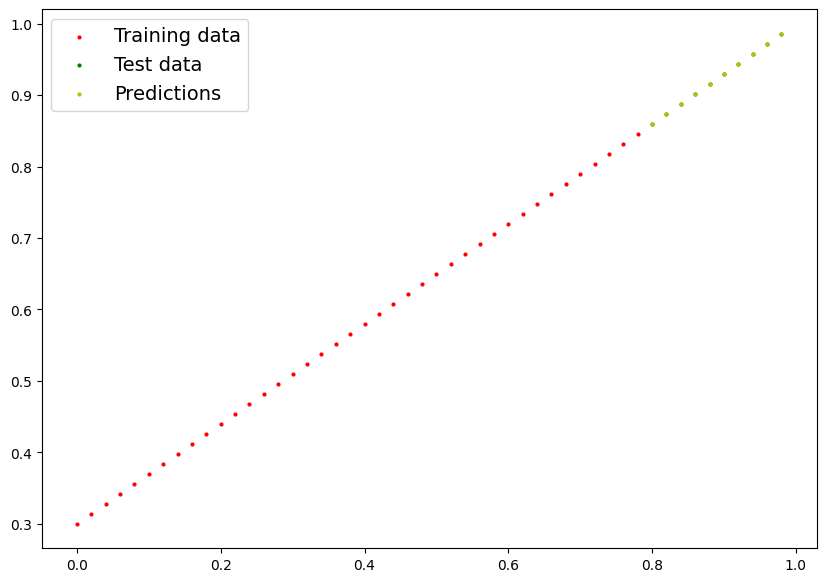

In [57]:
plot_predictions(predictions=y_preds.cpu()) # copy data to cpu first

#### 6.5 Saving & loading a trained model

In [62]:
from pathlib import Path

# 1. create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. create model save path
MODEL_NAME = "chapter_1_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(MODEL_SAVE_PATH)

# 3. Save the model state_dict()
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(), f=MODEL_SAVE_PATH)

models\chapter_1_model_1.pth
Saving model to: models\chapter_1_model_1.pth


In [63]:
# Load a model

# create a new instance
loaded_model_1 = LinearRegressionModelV2()

# Load the saved state_dict()
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# put the loaded model to device 
loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [68]:
next(loaded_model_1.parameters()).device

device(type='xpu', index=0)

In [69]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='xpu:0')),
             ('linear_layer.bias', tensor([0.3025], device='xpu:0'))])

In [70]:
# evaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
    loaded_model_1_preds = loaded_model_1(X_test)
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='xpu:0')

### Exercises
https://www.learnpytorch.io/01_pytorch_workflow/#exercises